# Generate correction profiles for denoised

by Pu Zheng

2019.06.18

In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

4776


In [3]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [4]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

# Illumination_correction

In [5]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = get_img_info.get_folders(master_folder, 'H')
folders = [_fd for _fd in folders if ('Cy' in _fd and '3color' not in _fd) or 'H0R0' in _fd]
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 3
- Number of field of views: 48
['\\\\10.245.74.158\\Chromatin_NAS_4\\20210501-colorswap_MEF_CTP-08\\H0R0', '\\\\10.245.74.158\\Chromatin_NAS_4\\20210501-colorswap_MEF_CTP-08\\H1R1_Cy7', '\\\\10.245.74.158\\Chromatin_NAS_4\\20210501-colorswap_MEF_CTP-08\\H2R2_Cy5']


In [6]:
# shared parameters
single_im_size = np.array([40,2048,2048])
all_colors = ['750','647','488','405']
# image and threads
num_images = 45
num_threads = 15

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '488', '405'] illumination profiles
-- 45 among 49 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H0R0
++ start multi-processing illumination profile calculateion with 15 threads for 45 images in 726.10s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\Corrections\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\Corrections\illumination_correction_647_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\Corrections\illumination_correction_488_2048x2048.npy
--- saving 405 profile into file: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\Corrections\illumination_correction_405_2048x2048.npy


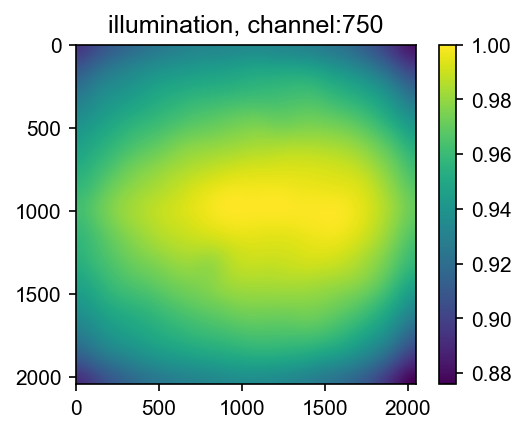

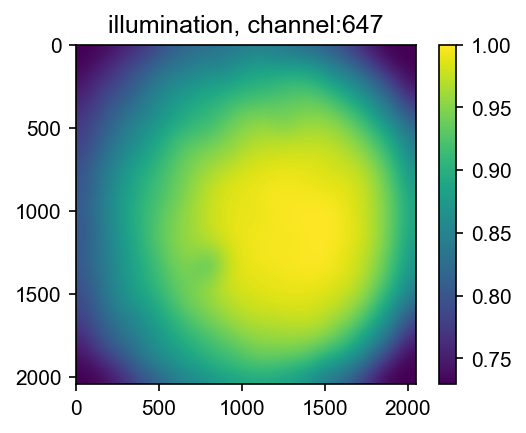

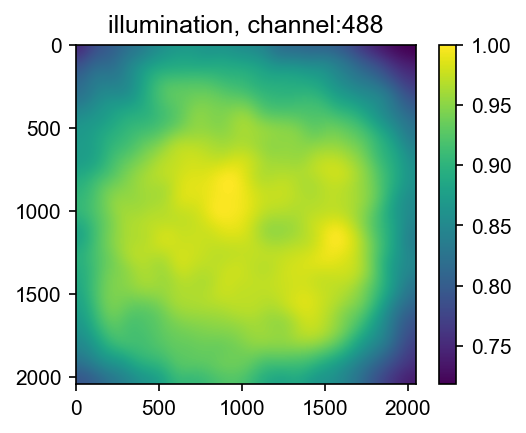

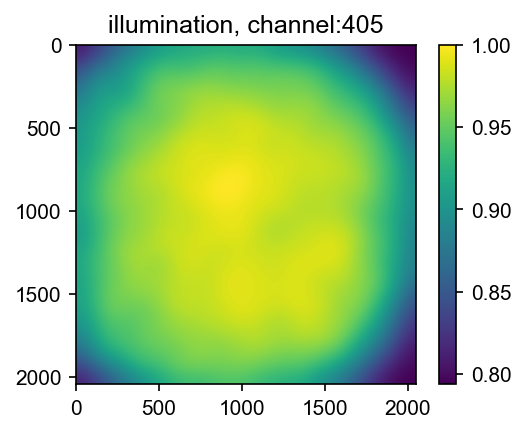

-- finish generating illumination profiles, time:738.29s


In [14]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_illumination_correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        gaussian_filter_size=40,
                        save=True, save_folder=correction_folder,
                        overwrite=False,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [7]:
cc_folder = folders[-2]
ref_folder = folders[-1]
print(f"chromatic_corr_folder: {cc_folder},\nref_folder:{ref_folder}")

chromatic_corr_folder: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7,
ref_folder:\\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H2R2_Cy5


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 45 images in 15 threads in 16.327s.
++ fitting polynomial orders: [0 1 1]
-- constants: [0.36797913] with rsquare=0.0
-- constants: [-1.56583030e-02 -4.94306483e-03 -1.80111165e-03 -1.75646546e-05] with rsquare=0.9412327206071116
-- constants: [-1.14545099e-01 -9.78315678e-04 -3.13718046e-05 -1.80337538e-03] with rsquare=0.9393615894860733
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\Corrections


<IPython.core.display.Javascript object>


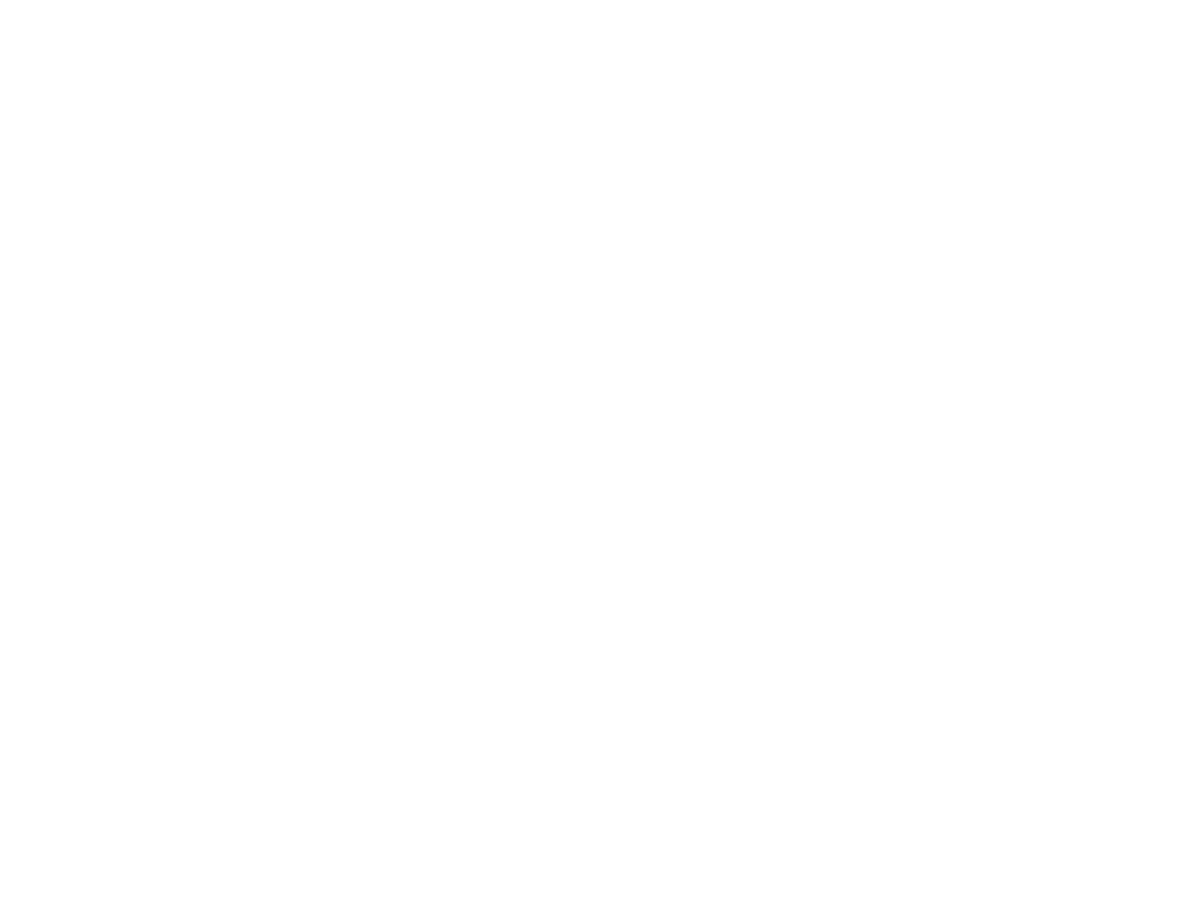

<IPython.core.display.Javascript object>


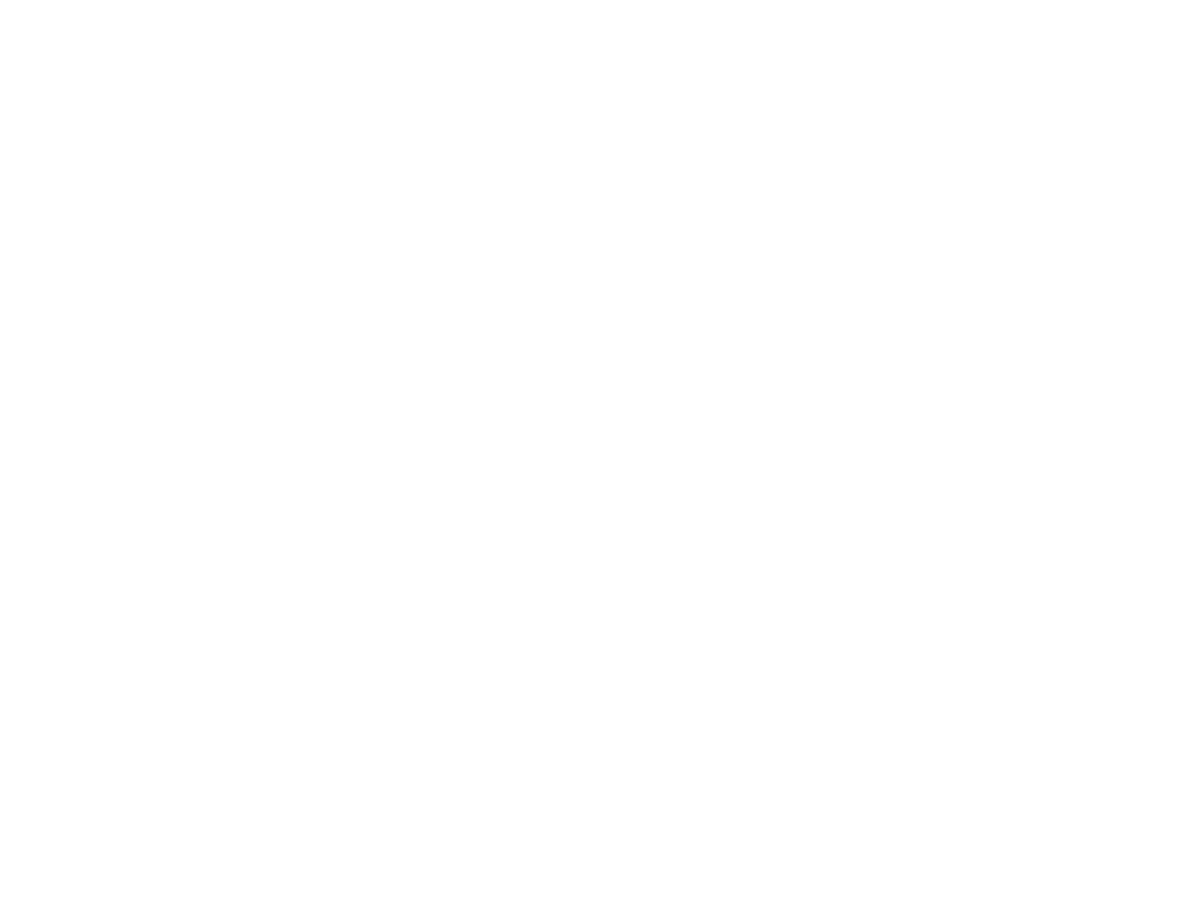

<IPython.core.display.Javascript object>


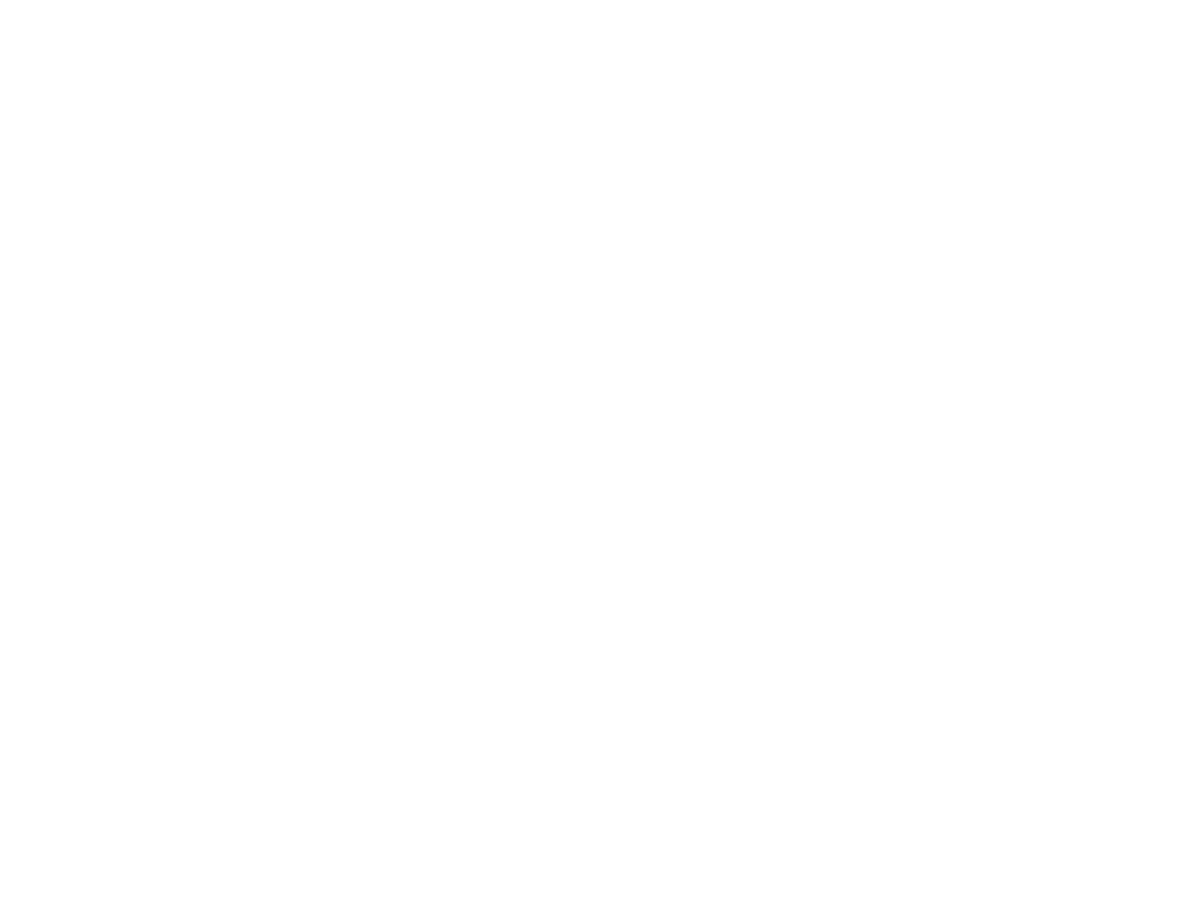

In [8]:
%matplotlib inline
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, 
                                    num_threads=num_threads, 
                                    fitting_orders=[0,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_temp=False,
                                    overwrite_profile=True)

### check chromatic abbrevation, 750-647

In [8]:
ref_filename = os.path.join(ref_folder, fovs[1])
cc_filename = os.path.join(cc_folder, fovs[1])

In [44]:
# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750, 488], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_01.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_40_2048_2048_const.pkl
	 647 None
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_01.dax  in 6.369s
-- removing hot pixels for channels:['750', '488'] in 20.219s
-- illumination correction for channels: 750, 488, in 4.266s
-- apply bead_drift calculate for channel: 488
-- aligning image -> directly use image
-- directly use ref_image
--- finish drift in 92.328s
-- drift: [-0.21 -0.62  4.83]
-- generate translation function for chromatic correction for channels: ['750'] and drift:[-0.21 -0.62  4.83] in 0.000s
-- finish correction in 124.418s


In [9]:
# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750, 488], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [750, 488], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H2R2_Cy5\Conv_zscan_01.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H2R2_Cy5\Conv_zscan_01.dax  in 5.781s
-- removing hot pixels for channels:['647', '488'] in 14.484s
-- illumination correction for channels: 647, 488, in 3.078s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 24.536s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_01.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_40_2048_2048_const.pkl
	 647

In [43]:
reload(correction_tools.alignment)
correction_tools.alignment.align_image(corr_ims[-1], ref_ims[-1], use_autocorr=True, 
                                       correction_args={'single_im_size': single_im_size}, detailed_verbose=True)

-- start aligning given source image to given reference image.
--- use auto correlation to calculate drift.
--- align image 0 in 4.937s.
--- drift: [ 0.03 -0.02  0.03]
--- use auto correlation to calculate drift.
--- align image 1 in 4.953s.
--- drift: [-0.12  0.15 -0.03]
--- use auto correlation to calculate drift.
--- align image 2 in 5.000s.
--- drift: [0.02 0.   0.05]
--- drifts for [0 1 2] pass the thresold, exit cycle.


array([-0.02333333,  0.04333333,  0.01666667])

In [38]:
reload(correction_tools.alignment)
correction_tools.alignment.align_image(raw_ims[-1], ref_ims[-1], use_autocorr=False, 
                                       correction_args={'single_im_size': single_im_size}, detailed_verbose=True)

-- start aligning given source image to given reference image.
--- use beads fitting to calculate drift.
-- start fitting spots in channel:488, 40 seeded, 

E:\Users\puzheng\anaconda3\lib\site-packages\scipy\optimize\minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


40 fitted in 7.406s.
-- start fitting spots in channel:488, 157 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:285: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


157 fitted in 5.656s.
-- 156 among 157 centers are selected by th=2.0
-- aligning 40 centers to 156 ref_centers, given drift:[  3. -12.  29.], 0 pairs found, updated_drift:nan
before check: nan 0
--- align image 0 in 13.516s.
--- drift: nan
--- use beads fitting to calculate drift.
-- start fitting spots in channel:488, 

E:\Users\puzheng\Documents\ImageAnalysis3\spot_tools\matching.py:207: RuntimeWarning: Mean of empty slice
  _new_drift = np.nanmean(_paired_tar_cts - _paired_ref_cts, axis=0)
E:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\alignment.py:678: RuntimeWarning: Mean of empty slice
  _mean_dft = np.nanmean(_drifts, axis=0)


33 seeded, 33 fitted in 5.813s.
-- start fitting spots in channel:488, 140 seeded, 140 fitted in 5.453s.
-- 140 among 140 centers are selected by th=2.0
-- aligning 33 centers to 140 ref_centers, given drift:[  3.  13. 222.], 0 pairs found, updated_drift:nan
before check: nan 0
--- align image 1 in 11.719s.
--- drift: nan
--- use beads fitting to calculate drift.
-- start fitting spots in channel:488, 14 seeded, 14 fitted in 5.189s.
-- start fitting spots in channel:488, 159 seeded, 159 fitted in 5.759s.
-- 159 among 159 centers are selected by th=2.0
-- aligning 14 centers to 159 ref_centers, given drift:[3. 0. 0.], 0 pairs found, updated_drift:nan
before check: nan 0
--- align image 2 in 11.422s.
--- drift: nan


AxisError: axis 1 is out of bounds for array of dimension 1

In [34]:

reload(correction_tools.alignment)
correction_tools.alignment.align_image(corr_ims[-1], ref_ims[-1], use_autocorr=True, 
                                       correction_args={'single_im_size': single_im_size})

-- start aligning given source image to given reference image.
--- use auto correlation to calculate drift.
--- align image 0 in 5.015s.
--- use auto correlation to calculate drift.
--- align image 1 in 5.031s.
--- use auto correlation to calculate drift.
--- align image 2 in 5.047s.


array([-0.02333333,  0.04333333,  0.01666667])

In [35]:
correction_tools.alignment.align_image(corr_ims[-1], ref_ims[-1], use_autocorr=False, 
                                       correction_args={'single_im_size': single_im_size})

-- start aligning given source image to given reference image.


E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:285: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


before check: [ 0.07955991  0.04270659 -0.00431055] 151
--- align image 0 in 12.149s.
before check: [-0.1298588   0.15000343 -0.04635264] 139
--- align image 1 in 11.930s.
before check: [0.01503202 0.01641369 0.04315543] 158
--- align image 2 in 12.366s.


array([-0.01419497,  0.07237547,  0.01145366])

<IPython.core.display.Javascript object>


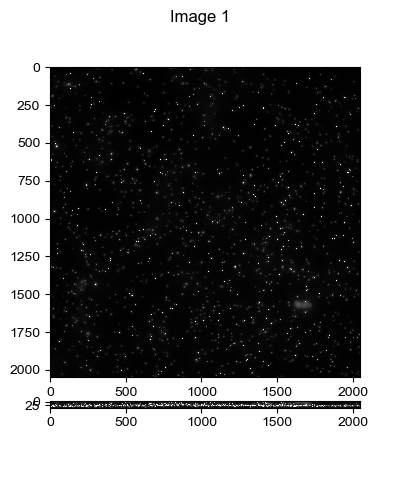

In [41]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([corr_ims[-1], ref_ims[-1]])

<IPython.core.display.Javascript object>


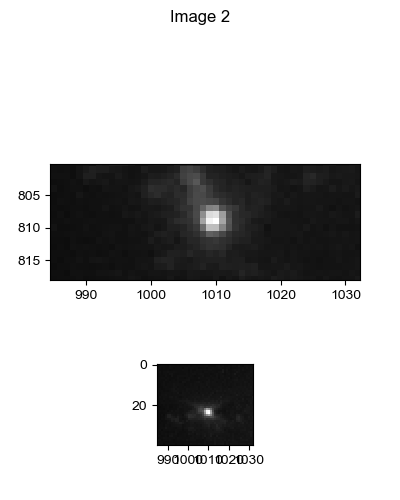

In [40]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [11]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function>

In [12]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 300

# warpped image
corr_spots = fit_fov_image(corr_ims[0], '750', th_seed=200, normalize_background=False)
# original image
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=200, normalize_background=False)
# reference
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=300, normalize_background=False)

corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:750, 49 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:285: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


49 fitted in 252.780s.
-- start fitting spots in channel:750, 54 seeded, 54 fitted in 256.339s.
-- start fitting spots in channel:647, 363 seeded, 363 fitted in 250.656s.


In [21]:
int_th = 500
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

<IPython.core.display.Javascript object>


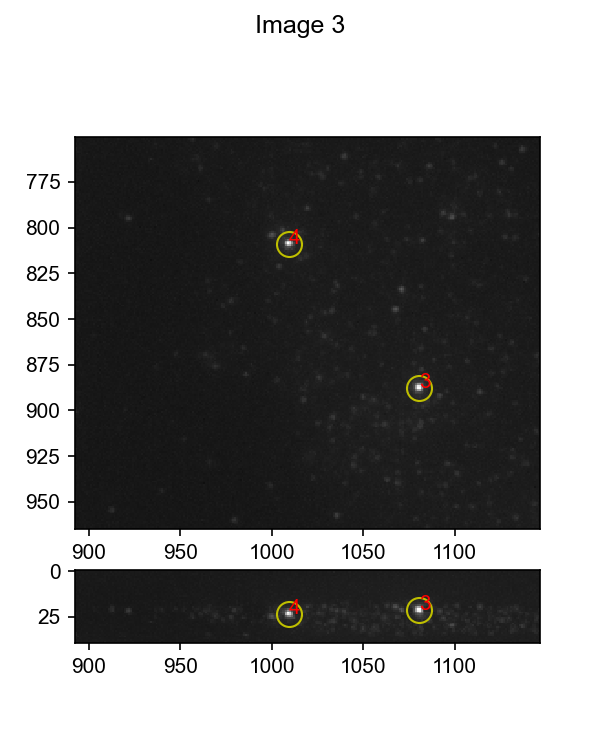

In [27]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in raw_spots)
coord_dict['class_ids'] += list(0 * np.ones(len(raw_spots),dtype=np.int))

coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in corr_spots)
coord_dict['class_ids'] += list(1 * np.ones(len(corr_spots),dtype=np.int))

coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in ref_spots[ref_spots[:,0] > 1000])
coord_dict['class_ids'] += list(2 * np.ones(len(ref_spots[ref_spots[:,0] > 1000]),dtype=np.int))



fig=plt.figure(figsize=(4,5), dpi=150)    
    
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]],
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>


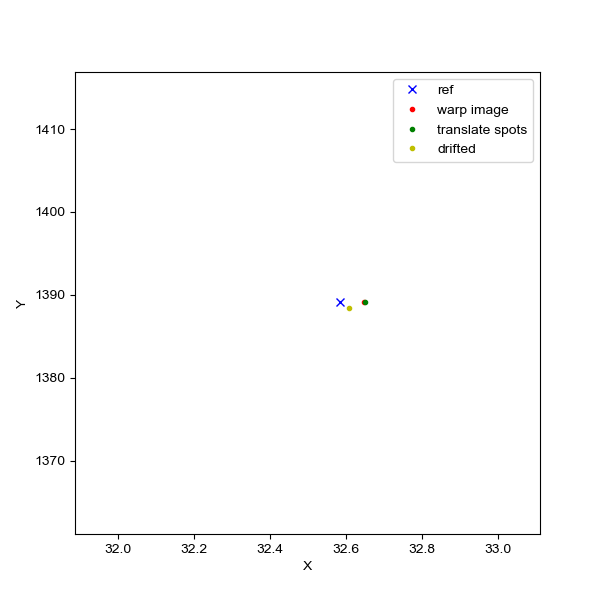

In [28]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(ref_spots[ref_spots[:,0] > 1000,1], ref_spots[ref_spots[:,0] > 1000,3], 'bx', label='ref')
plt.plot(corr_spots[:,1], corr_spots[:,3], 'r.', label='warp image')
plt.plot(corr_raw_spots[:,1], corr_raw_spots[:,3], 'g.', label='translate spots')
plt.plot(raw_spots[:,1]+drift[1], raw_spots[:,3]+drift[2], 'y.', label='drifted')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<IPython.core.display.Javascript object>


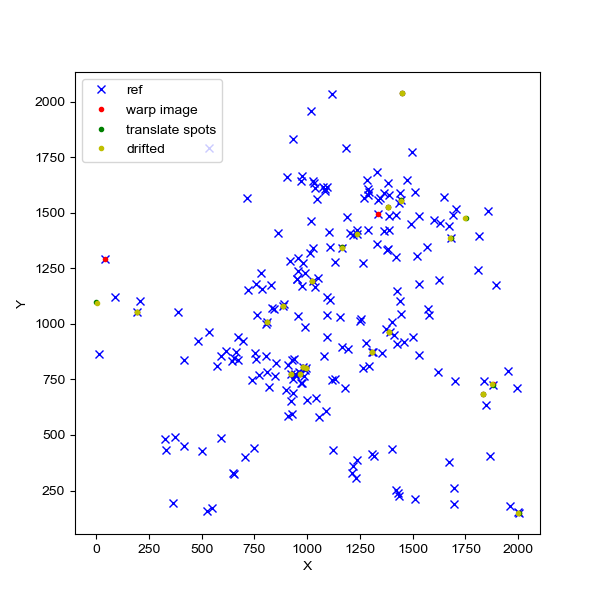

In [23]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(ref_spots[:,2], ref_spots[:,3], 'bx', label='ref')
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='warp image')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='translate spots')
plt.plot(raw_spots[:,2]+drift[1], raw_spots[:,3]+drift[2], 'y.', label='drifted')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [22]:
from ImageAnalysis3.spot_tools.matching import find_paired_centers, check_paired_centers

# matching
_new_drift, paired_ref_cts, paired_corr_cts = find_paired_centers(ref_spots[:,1:4], corr_spots[:,1:4], drift=drift)
print(_new_drift)
_new_drift, paired_ref_cts, paired_corr_cts = check_paired_centers(paired_ref_cts, paired_corr_cts+drift)
print(_new_drift)

nan


E:\Users\puzheng\Documents\ImageAnalysis3\spot_tools\matching.py:207: RuntimeWarning: Mean of empty slice
  _new_drift = np.nanmean(_paired_tar_cts - _paired_ref_cts, axis=0)


ValueError: operands could not be broadcast together with shapes (0,) (3,) 

## visualize

<IPython.core.display.Javascript object>


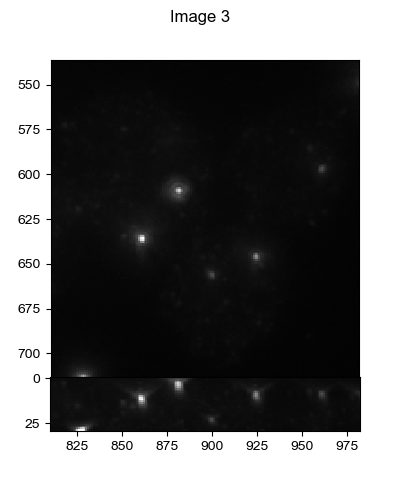

In [16]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

# bleedthrough correction

In [23]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750','647'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
}

bleedthrough_fitting_args = {'max_num_seeds':1000,
    'th_seed': 300,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

In [44]:
info_dicts

[{'coord': array([  18.055817, 1025.7837  , 1188.0149  ], dtype=float32),
  'ref_im': array([[[ 354,  319,  411,  381,  342,  384,  333,  386,  331],
          [ 398,  331,  390,  374,  376,  427,  361,  336,  359],
          [ 363,  315,  352,  341,  361,  367,  349,  335,  344],
          [ 322,  318,  297,  305,  332,  374,  329,  336,  311],
          [ 330,  338,  358,  342,  305,  315,  334,  349,  352],
          [ 314,  324,  320,  312,  326,  329,  339,  354,  325],
          [ 365,  305,  338,  320,  316,  320,  335,  353,  335],
          [ 354,  288,  294,  374,  365,  340,  308,  319,  293],
          [ 341,  325,  305,  316,  356,  286,  322,  356,  372]],
  
         [[ 400,  379,  389,  436,  493,  492,  439,  437,  378],
          [ 395,  434,  376,  485,  582,  622,  577,  426,  383],
          [ 398,  451,  484,  537,  573,  697,  619,  558,  417],
          [ 383,  459,  514,  550,  577,  552,  533,  498,  406],
          [ 395,  484,  486,  506,  505,  476,  494,  

In [123]:
num_kept = 0
for _dict in info_dicts:
    if correction_tools.bleedthrough.check_bleedthrough_info(_dict, _rsq_th=0.75):
        num_kept += 1
print(num_kept)

109


In [119]:
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

In [144]:
# load info
info_dicts = []
for _fov in fovs:
    temp_basename = f"bleedthrough_{_fov.split(os.extsep)[0]}_ref_750_to_647.pkl"
    if os.path.isfile(os.path.join(folders[1], temp_basename)):
        temp_dicts = pickle.load(open(os.path.join(folders[1], temp_basename), 'rb'))
        info_dicts.extend(temp_dicts)

In [145]:
(np.array(np.shape(_dict['ref_im']))-1)/2-1

array([3., 3., 3.])

In [146]:
xp, slopes, intercepts = [], [], []

for _dict in info_dicts:
    _max_inds = np.array(np.unravel_index(np.argmax(_dict['ref_im']), np.shape(_dict['ref_im'])))
    _im_ct_inds = (np.array(np.shape(_dict['ref_im']))-1)/2
    
    #if (_max_inds >= _im_ct_inds-0.5).all() and (_max_inds <= _im_ct_inds+0.5).all():
    if correction_tools.bleedthrough.check_bleedthrough_info(_dict, _rsq_th=0.75, _center_radius=0.5):
        xp.append(_dict['coord'][1])
        slopes.append(_dict['slope'])
        intercepts.append(_dict['intercept'])
    else:
        if _dict['slope'] > 10:
            print(os.path.basename(_dict['file']), _dict['rsquare'], _dict['slope'])

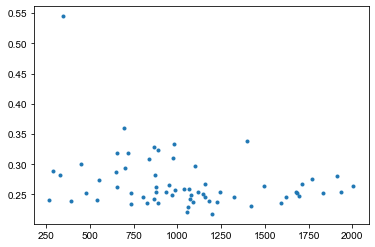

In [147]:
plt.figure()
plt.plot(xp, slopes, '.')
plt.show()

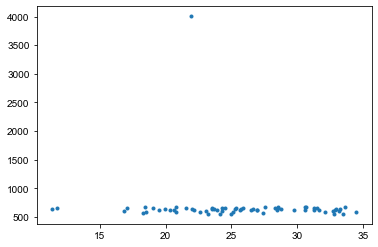

In [148]:
xp, slopes, intercepts = [], [], []
vis_ref_ims = []
vis_bld_ims = []
for _dict in info_dicts:
    if _dict['rsquare'] > 0.75:

        if _dict['slope'] <50:
            xp.append(_dict['coord'][0])
            slopes.append(_dict['slope'])
            intercepts.append(_dict['intercept'])
            vis_ref_ims.append(_dict['ref_im'])
            vis_bld_ims.append(_dict['bleed_im'])
        else:
            if _dict['intercept'] < 0:
                print(_dict['file'])
plt.figure()
plt.plot(xp, intercepts, '.')
plt.show()

<IPython.core.display.Javascript object>


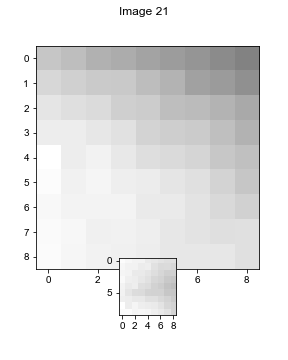

In [77]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(vis_bld_ims)

In [45]:
from sklearn.linear_model import LinearRegression

In [58]:
?LinearRegression

In [48]:
reg_model = LinearRegression(fit_intercept=False)

In [59]:
x = np.arange(10)
y = 1+ 2*x

In [63]:
reg_model = LinearRegression(fit_intercept=False)
reg_model.fit(x[:,np.newaxis],y)

LinearRegression(fit_intercept=False)

In [66]:
reg_model.score(x[:,np.newaxis],y)

0.9912280701754386

In [60]:
for _dict in info_dicts:
    reg_model = LinearRegression(fit_intercept=False)
    _x, _y = np.ravel(_dict['ref_im']), np.ravel(_dict['bleed_im'])
    reg_model.fit(_x[:,np.newaxis], _y)
    _rsq = reg_model.score(np.ravel(_dict['ref_im'])[:,np.newaxis], )
    print(reg_model.coef_, _dict['slope'], _rsq, _dict['rsquare'])
    

[1.34299016] 0.22848710133406372 -20.067433781669994 0.685237654982664
[1.45058718] 0.25392355983675785 -22.59621688308017 0.8034268678524473
[1.36481026] 0.23852850304124512 -18.83487224391229 0.7298898666560274
[1.55525505] 0.2548961541881525 -22.85948556239519 0.7119682331019757
[1.24108987] 0.23853979046847387 -15.880270108613622 0.7313935889175727
[1.49387446] 0.33413002342370535 -11.311511195651976 0.8282577223931153
[1.62411546] 0.3230895255069643 -15.599854648301793 0.7907936980702739
[1.74845308] 0.22693518033682722 -31.490669918564777 0.5972547759594999
[1.66105505] 0.21924575577973027 -25.563178000303317 0.5174979654648437
[1.31668486] 0.21345617164122505 -20.817454370916902 0.676025435124026
[2.0942429] 0.2616458637458767 -33.94727663133064 0.5745240091072381
[1.84853583] 0.4686105393511824 -6.45982464800173 0.7402474736298252
[1.7634053] 0.21490843567724838 -23.618488423279697 0.4096492463718783
[2.15275069] 0.2375570295798655 -29.123721380647314 0.38831410366572294
[2.061

+ generating bleedthrough profiles.
++ generating bleedthrough info for 45 images in 15 threads in 4.522s.
- check 64 bleedthrough pairs.
- start iteration with outlier_sigma=3.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.969, total: 0.969 in 0.078s
- 62 pairs passed.
-- 62 spots are used to generate profiles from 750 to 647
[ 3.33537878e-01 -1.68054273e-03 -1.49116093e-05 -1.03100191e-05] 0.147279911618581
[ 5.66693182e+02  3.39356253e-01 -5.54172716e-04  4.77301416e-02] 0.36800522104798206
-- saving bleedthrough temp profile from channel: 750 to channel: 647.


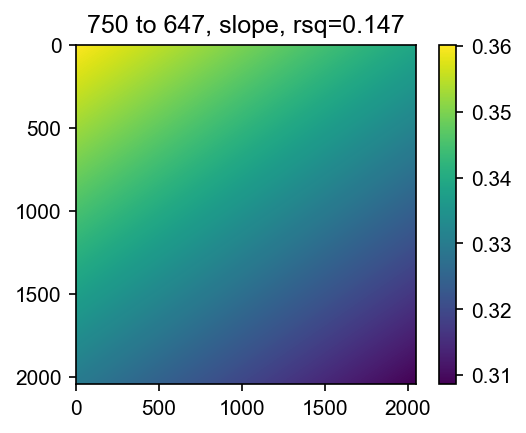

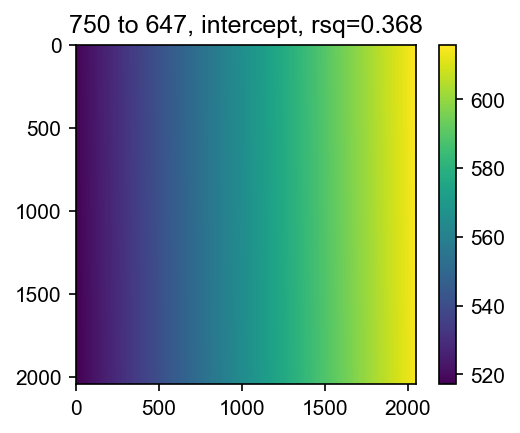

-- not enough spots (4) from 647 to 750
-- generating inverse matrix.
-- saving to file:\\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\Corrections\bleedthrough_correction_750_647_2048_2048.npy


In [150]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[1:3],
            rsq_th=0.75,
            intensity_th=300,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_order=1,
            fitting_args=bleedthrough_fitting_args,
            interpolate_args={'check_params':{'outlier_sigma':3.}, 'min_num_spots':50},
            num_images=num_images, 
            num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            )

### Check bleedthorugh for cy7

In [151]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [152]:
cy7_filename = os.path.join(folders[1], fovs[3])
print(cy7_filename)

\\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_03.dax


In [153]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[1], fovs[3])

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_03.dax  in 6.422s
-- removing hot pixels for channels:['750', '647'] in 20.297s
-- illumination correction for channels: 750, 647, in 4.375s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 32.552s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
-- loading image from fil

<IPython.core.display.Javascript object>


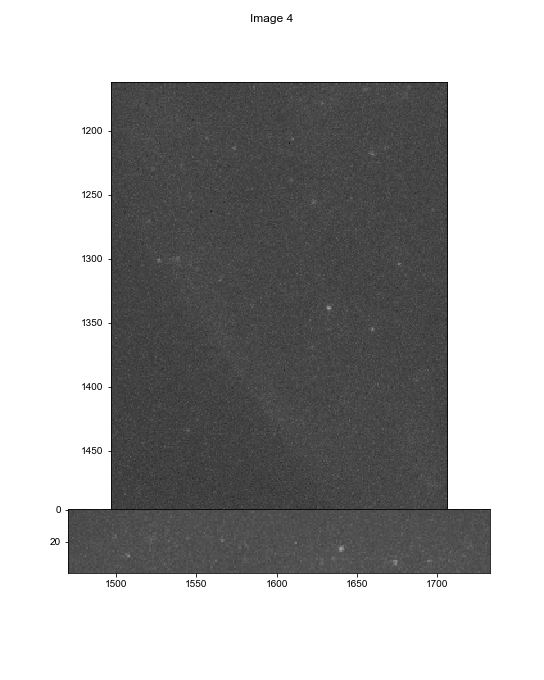

In [154]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

## Check bleedthrough for cy5

In [155]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[1], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_03.dax  in 6.018s
-- removing hot pixels for channels:['750', '647'] in 20.203s
-- illumination correction for channels: 750, 647, in 4.424s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 31.907s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20210501-colorswap_MEF_CTP-08\H1R1_Cy7\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
-- loading image from fil

<IPython.core.display.Javascript object>


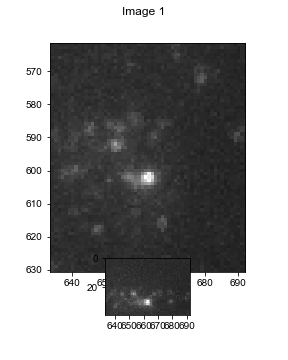

In [156]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[0], cy5_raw_ims[1], cy5_corr_ims[1], cy5_corr_ims[0]])